In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
ross_df = pd.read_csv('train.csv', low_memory=False)
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [9]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Preprocessing and Feature Engineering

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merged_df)
split_date(merged_test_df)

In [13]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


Below is the number of rows where the store is closed i.e. the value of Open columns is 0

In [14]:
merged_df[merged_df.Open == 0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

Removing the rows from dataframe where the store is closed, but not removing from test dataframe because we need to test for each row in test dataframe.

In [15]:
merged_df = merged_df[merged_df.Open == 1].copy()

Competition:
we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store. Adding a new column Competition Open

In [16]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [17]:
comp_months(merged_df)
comp_months(merged_test_df)

In [18]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
225949,2015-01-10,15320.0,2011.0,3.0,46.0
386797,2014-07-24,3890.0,NaN,NaN,0.0
662250,2013-11-15,40540.0,2002.0,2.0,141.0
545571,2014-02-27,24000.0,2013.0,4.0,10.0
754343,2013-08-24,3640.0,NaN,NaN,0.0
955275,2013-02-25,1850.0,2014.0,12.0,0.0
327282,2014-09-25,250.0,NaN,NaN,0.0
113887,2015-04-20,11840.0,NaN,NaN,0.0
265145,2014-12-01,6270.0,2005.0,8.0,112.0
490938,2014-04-17,2030.0,2000.0,8.0,164.0


Additional Promotion:
To indicate how long a store has been doing Promo2 and whether a new round starts this month

In [19]:
def check_promo_month(row):
  month2str = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
  }

  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Promo2Open'] and month2str[row['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0


In [20]:
def promo_cols(df):
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
  df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0)*df['Promo2']
  df['IsPromo2Month'] = df.apply(check_promo_month, axis = 1)*df['Promo2']

In [21]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [22]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
374839,2014-08-05,0,NaN,NaN,NaN,0.000000,0
732082,2013-09-13,0,NaN,NaN,NaN,0.000000,0
856421,2013-05-25,1,2009.0,37.0,"Jan,Apr,Jul,Oct",44.327869,0
483581,2014-04-24,1,2013.0,31.0,"Jan,Apr,Jul,Oct",8.786885,1
276564,2014-11-19,0,NaN,NaN,NaN,0.000000,0
265299,2014-12-01,0,NaN,NaN,NaN,0.000000,0
833858,2013-06-14,0,NaN,NaN,NaN,0.000000,0
57459,2015-06-10,0,NaN,NaN,NaN,0.000000,0
485135,2014-04-23,0,NaN,NaN,NaN,0.000000,0
990136,2013-01-25,1,2011.0,22.0,"Feb,May,Aug,Nov",19.868852,0


Input and Target Columns

In [23]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [24]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday','SchoolHoliday',
              'StoreType','Assortment','CompetitionDistance','CompetitionOpen',
              'Day','Month','Year','WeekOfYear','Promo2',
              'Promo2Open','IsPromo2Month']
target_cols = 'Sales'

In [25]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_cols].copy()

In [26]:
test_inputs = merged_test_df[input_cols].copy()

Identifying Numeric and categorical cols

In [27]:
numeric_cols = ['Store',
                'Promo',
                'SchoolHoliday',
                'CompetitionDistance',
                'CompetitionOpen',
                'Day',
                'Month',
                'Year',
                'WeekOfYear',
                'Promo2',
                'Promo2Open',
                'IsPromo2Month']
categorical_cols = ['DayOfWeek','StateHoliday', 'StoreType', 'Assortment']

Imputing missing values

In [28]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [29]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
dtype: int64

In [30]:
max_distance = inputs.CompetitionDistance.max()

In [31]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

Scaling numerical Features

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [33]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Encoding categorical columns

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [35]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [36]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [37]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Gradient Boosting

Training

In [38]:
from xgboost import XGBRegressor

In [39]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 20, max_depth = 4)

In [40]:
%%time
model.fit(X, targets)

CPU times: total: 11 s
Wall time: 984 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

Prediction

In [41]:
preds = model.predict(X)

In [42]:
preds

array([ 7960.0273,  7581.6953,  7993.1504, ...,  7102.0664,  8724.751 ,
       10748.863 ], dtype=float32)

Evaluation

In [43]:
from sklearn.metrics import mean_squared_error
def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [44]:
rmse(preds, targets)

2397.194095204547

In [45]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30,30

<Axes: >

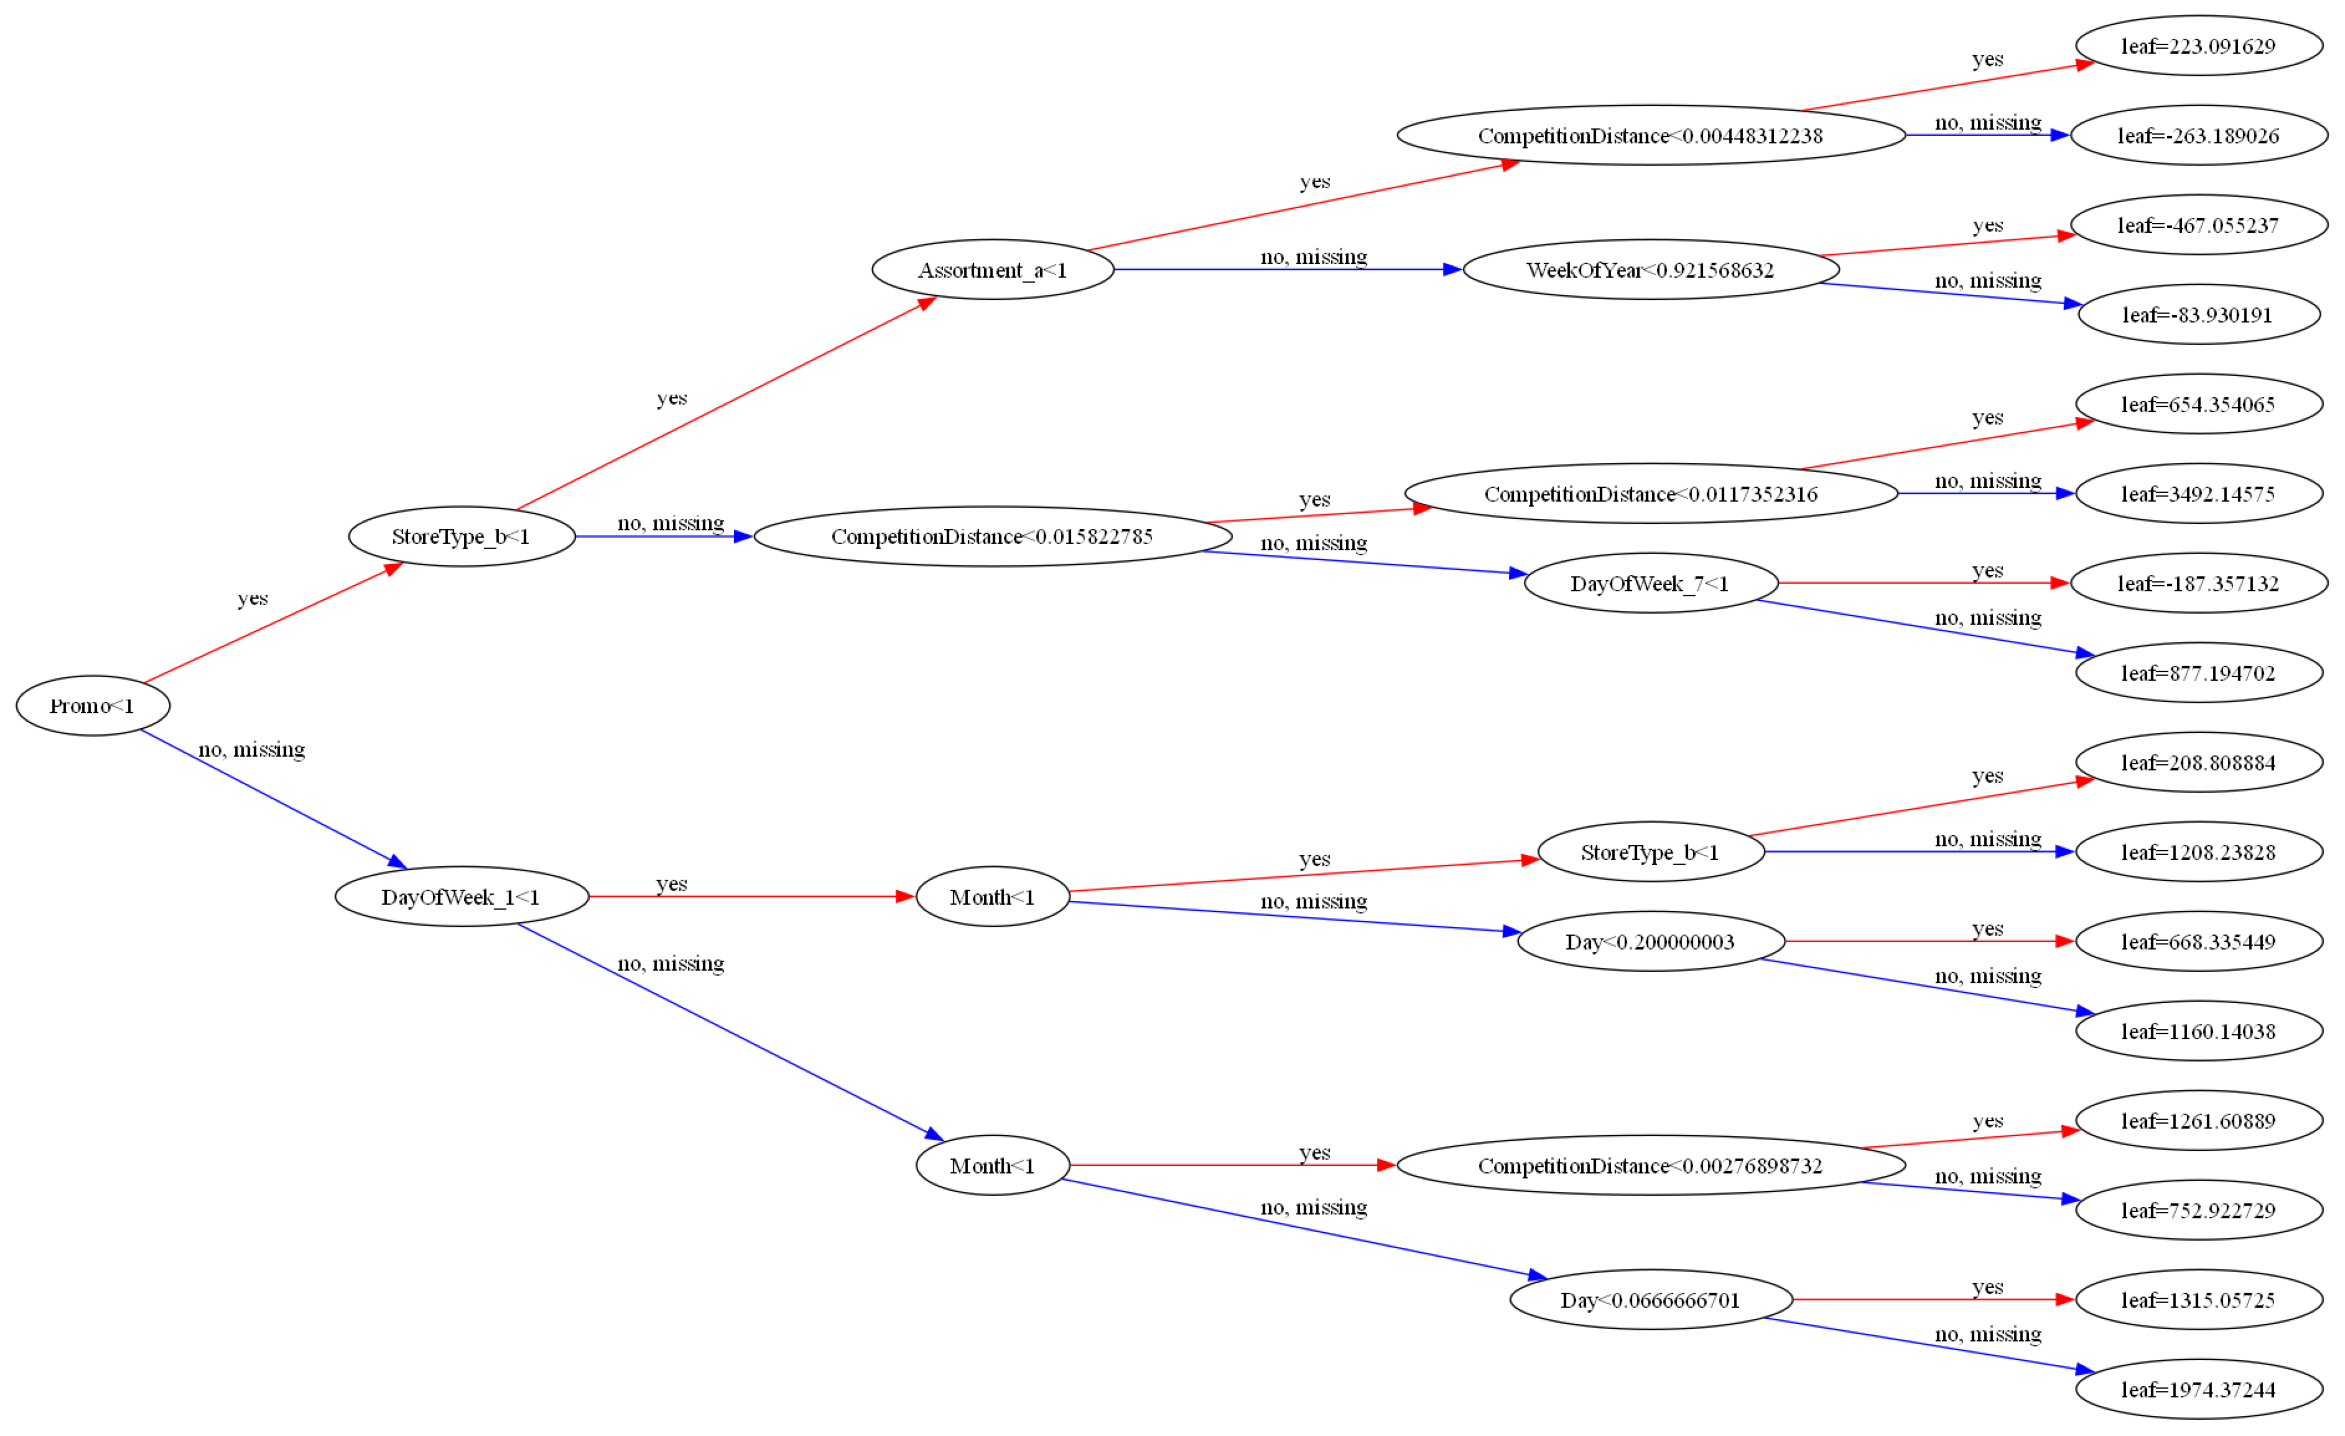

In [46]:
plot_tree(model, rankdir='LR')

<Axes: >

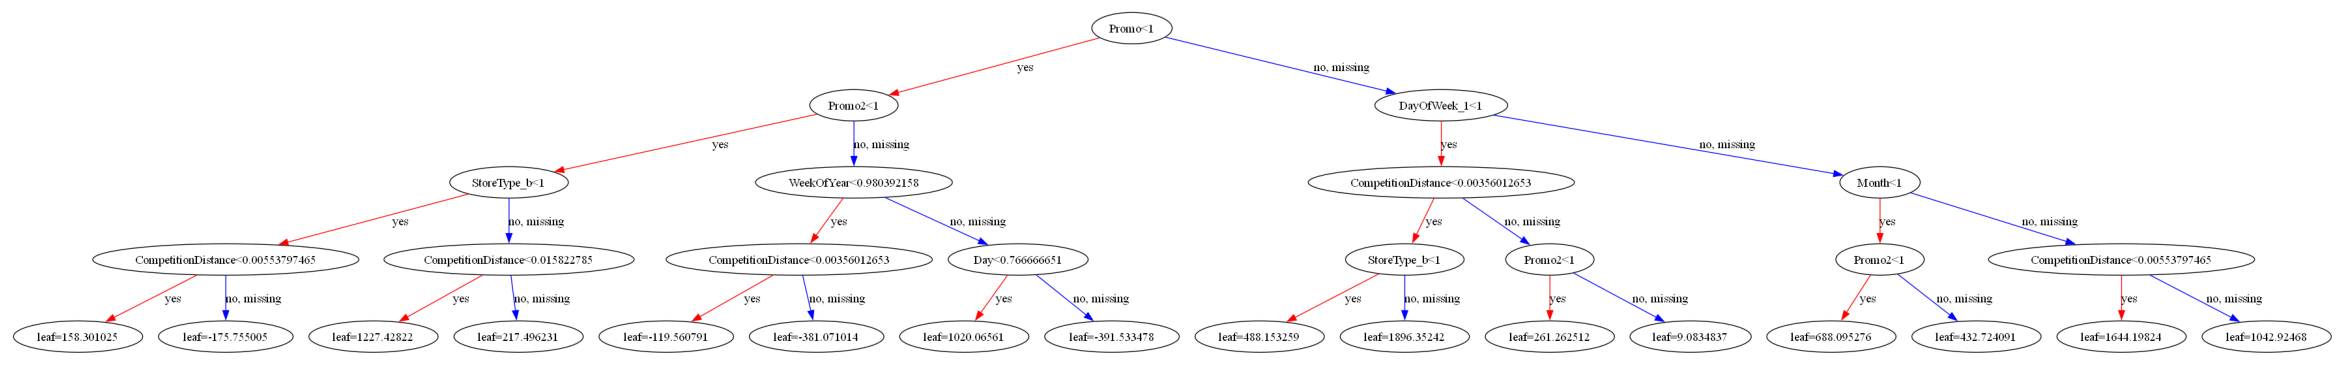

In [47]:
plot_tree(model, randir='LR', num_trees=1)

<Axes: >

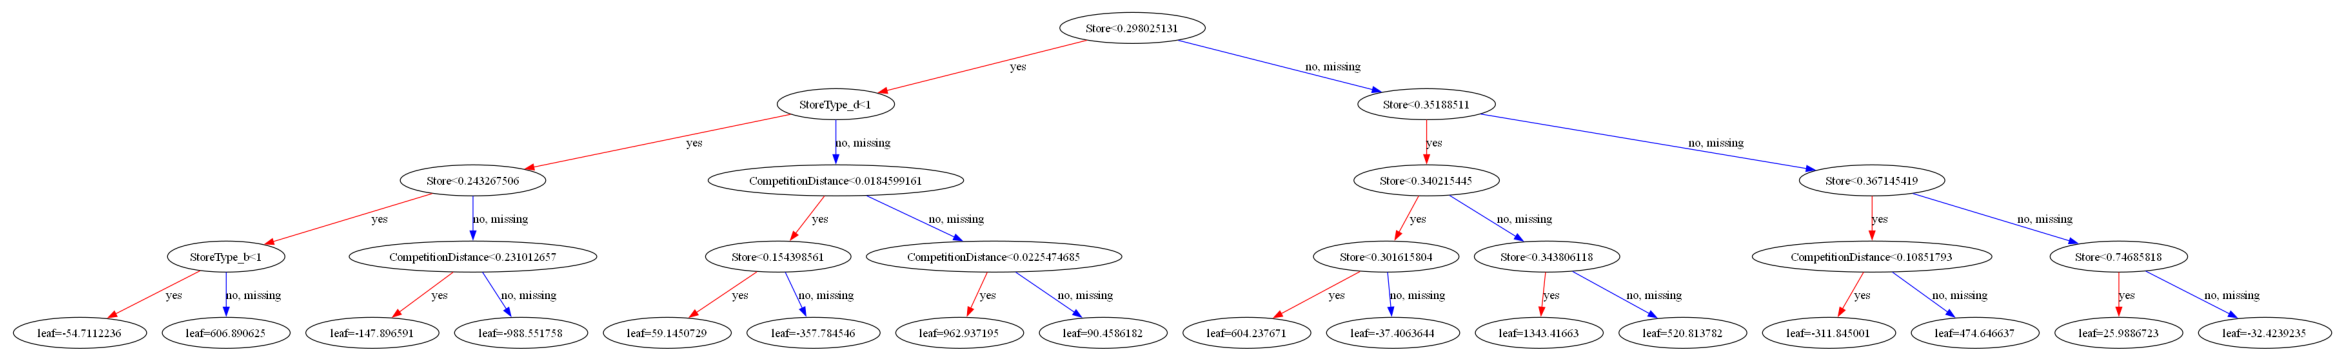

In [48]:
plot_tree(model, randir='LR', num_trees=19)

In [49]:
trees = model.get_booster().get_dump()

In [50]:
len(trees)

20

In [51]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.00448312238] yes=15,no=16,missing=16
				15:leaf=223.091629
				16:leaf=-263.189026
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-467.055237
				18:leaf=-83.930191
		4:[CompetitionDistance<0.015822785] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.0117352316] yes=19,no=20,missing=20
				19:leaf=654.354065
				20:leaf=3492.14575
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-187.357132
				22:leaf=877.194702
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=208.808884
				24:leaf=1208.23828
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=668.335449
				26:leaf=1160.14038
		6:[Month<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00276898732] yes=27,no=28,missing=28
				27:leaf=1261.60889
				28:leaf=752.9

Feature Importance

In [52]:
importance_df = pd.DataFrame({
  'feature': X.columns,
  'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [53]:
importance_df.head(10)

,feature,importance
1,Promo,0.319169
12,DayOfWeek_1,0.077843
24,StoreType_b,0.070759
9,Promo2,0.053933
26,StoreType_d,0.052074
6,Month,0.036868
27,Assortment_a,0.035399
8,WeekOfYear,0.035368
29,Assortment_c,0.034871
3,CompetitionDistance,0.032024


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

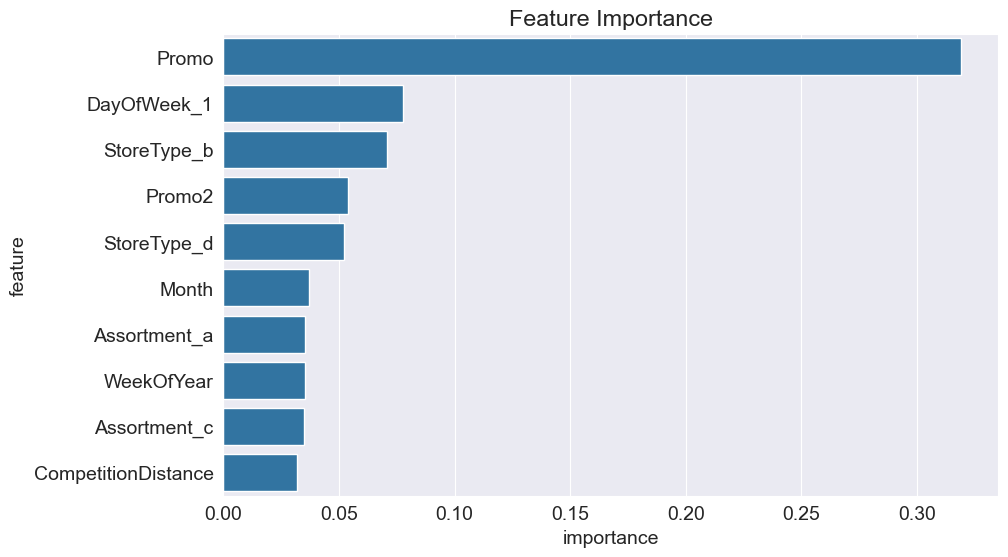

In [54]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x = 'importance', y = 'feature')

K Fold Cross Validation

In [55]:
from sklearn.model_selection import KFold

In [56]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

In [57]:
Kfold = KFold(n_splits=5)

In [58]:
models = []

for train_idxs, val_idxs in Kfold.split(X):
  X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
  X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(
                                                    X_train,
                                                    train_targets,
                                                    X_val,
                                                    val_targets,
                                                    max_depth = 4,
                                                    n_estimators = 20
                                                  )
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse,val_rmse))

Train RMSE: 2386.2590620158558, Validation RMSE: 2456.0948984496713
Train RMSE: 2401.172216164771, Validation RMSE: 2449.9990186176237
Train RMSE: 2411.8926798093644, Validation RMSE: 2391.5910868526794
Train RMSE: 2347.002399625332, Validation RMSE: 2439.3327073738474
Train RMSE: 2397.846194846173, Validation RMSE: 2466.512201654716


In [59]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis = 0)

In [60]:
preds = predict_avg(models, X)

In [61]:
preds

array([8108.22  , 7676.0312, 8897.35  , ..., 7368.704 , 7850.032 ,
       9768.516 ], dtype=float32)

Hyperparameter Tuning and regularization

In [62]:
def test_params_kfold(n_splits, **params):
  train_rmses, val_rmses, models = [], [], []
  kfold = KFold(n_splits)
  for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc(train_idxs)
    X_val, val_targets = X.iloc[val_idxs], targets.iloc(val_idxs)
    model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
    models.append(model)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [64]:
def test_params(**params):
  model = XGBRegressor(n_jobs = -1, random_state = 42, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

n_estimators

In [65]:
test_params(n_estimators = 10)

Train RMSE: 2343.859397656814, Validation RMSE: 2336.3165050532134


In [66]:
test_params(n_estimators = 30)

Train RMSE: 1823.2031781409767, Validation RMSE: 1812.823240243605


In [67]:
test_params(n_estimators = 100)

Train RMSE: 1167.450260308741, Validation RMSE: 1160.711786904996


In [68]:
test_params(n_estimators = 240)

Train RMSE: 897.9913675593189, Validation RMSE: 895.4499770288974


max_depth

In [69]:
test_params(max_depth = 2)

Train RMSE: 2396.555978396764, Validation RMSE: 2386.0717502839057


In [70]:
test_params(max_depth = 5)

Train RMSE: 1410.285557428663, Validation RMSE: 1402.644448383821


In [71]:
test_params(max_depth = 10)

Train RMSE: 661.2371041922936, Validation RMSE: 744.8673438814984


In [72]:
test_params(max_depth = 15)

Train RMSE: 287.3833663530674, Validation RMSE: 770.277835686483


learningRate

In [73]:
test_params(learning_rate = 0.01)

Train RMSE: 2634.7790759135, Validation RMSE: 2631.0758400362156


In [74]:
test_params(learning_rate = 0.1)

Train RMSE: 1835.6651836771155, Validation RMSE: 1827.9450132996558


In [75]:
test_params(learning_rate = 0.3)

Train RMSE: 1167.450260308741, Validation RMSE: 1160.711786904996


In [76]:
test_params(learning_rate = 0.6)

Train RMSE: 996.0465599103018, Validation RMSE: 993.5784642997573


In [77]:
test_params(learning_rate = 0.9)

Train RMSE: 958.2042906052317, Validation RMSE: 962.8106207776755


booster

In [78]:
test_params(booster='gblinear')

Train RMSE: 2727.558173904071, Validation RMSE: 2717.23861486216


Making predictions

In [79]:
model = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 1000, 
                     learning_rate = 0.2, max_depth = 10, subsample = 0.9,
                     colsample_bytree = 0.7)

In [80]:
%%time
model.fit(X, targets)

CPU times: total: 13min 11s
Wall time: 1min


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [81]:
test_preds = model.predict(X_test)

In [82]:
submission_df['Sales'] = test_preds

In [83]:
test_df.Open.isna().sum()

11

In [84]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [85]:
submission_df

,Id,Sales
0,1,4630.774414
1,2,7113.659180
2,3,9303.010742
3,4,7389.714355
4,5,6952.242676
...,...,...
41083,41084,3328.925293
41084,41085,7273.968750
41085,41086,7065.032227
41086,41087,25530.414062


In [86]:
submission_df.to_csv('sample_submission.csv', index = None)